<a href="https://colab.research.google.com/github/valeryspy/airline-satisfaction-classification/blob/main/Airline_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification Tree in Python. Analysis of airline customer satisfaction

In this project I will use **scikit-learn** library to build a **Classification Tree** which uses categorical data from the [Kaggle](https://www.kaggle.com/datasets/teejmahal20/airline-passenger-satisfaction) repository to predict **arline customer satisfaction**. I will then build additional Classification Tree models and validate the best one.

For validation purposes I will use the following metrics:
1.   Accuracy
2.   ROC AUC
3.   Confusion Matrix

The size of the raw dataset:

* 129880 rows
* 25 columns

Let's do it!


Importing all necessary modules and libraries that will be used.

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics

My dataset was split into train and test data, but I need to analyse and clean it first, that's why I will combine it.

In [ ]:
%cat "/content/drive/MyDrive/Airline Classificator/train.csv" | tail +2 > "/content/drive/MyDrive/Airline Classificator/train_no_head.csv"
%cat "/content/drive/MyDrive/Airline Classificator/train_no_head.csv" | head -5

0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [ ]:
%cat "/content/drive/MyDrive/Airline Classificator/test.csv" "/content/drive/MyDrive/Airline Classificator/train_no_head.csv" > "/content/drive/MyDrive/Airline Classificator/combined.csv"

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Airline Classificator/combined.csv")

At this stage, I am ready to analyse and clean my dataset.

Let's start with analysing the columns.

In [ ]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

I'm deleting the first 2 columns (`Unnamed: 0` and `id`), because they are not needed.

In [ ]:
df.drop(df.columns[[0, 1]],axis = 1,inplace=True)

Now checking if the columns were removed

In [ ]:
df.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

In [ ]:
df.shape

(129880, 23)

Most of the columns are numeric, but there are some that have type object. Let's see what kind of unique values such variable holds.

In [ ]:
df["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

A great way of analysing a dataset is to check the distrubution of each variable. Let's draw a histogram to display and analyse the distribution of data in each column.

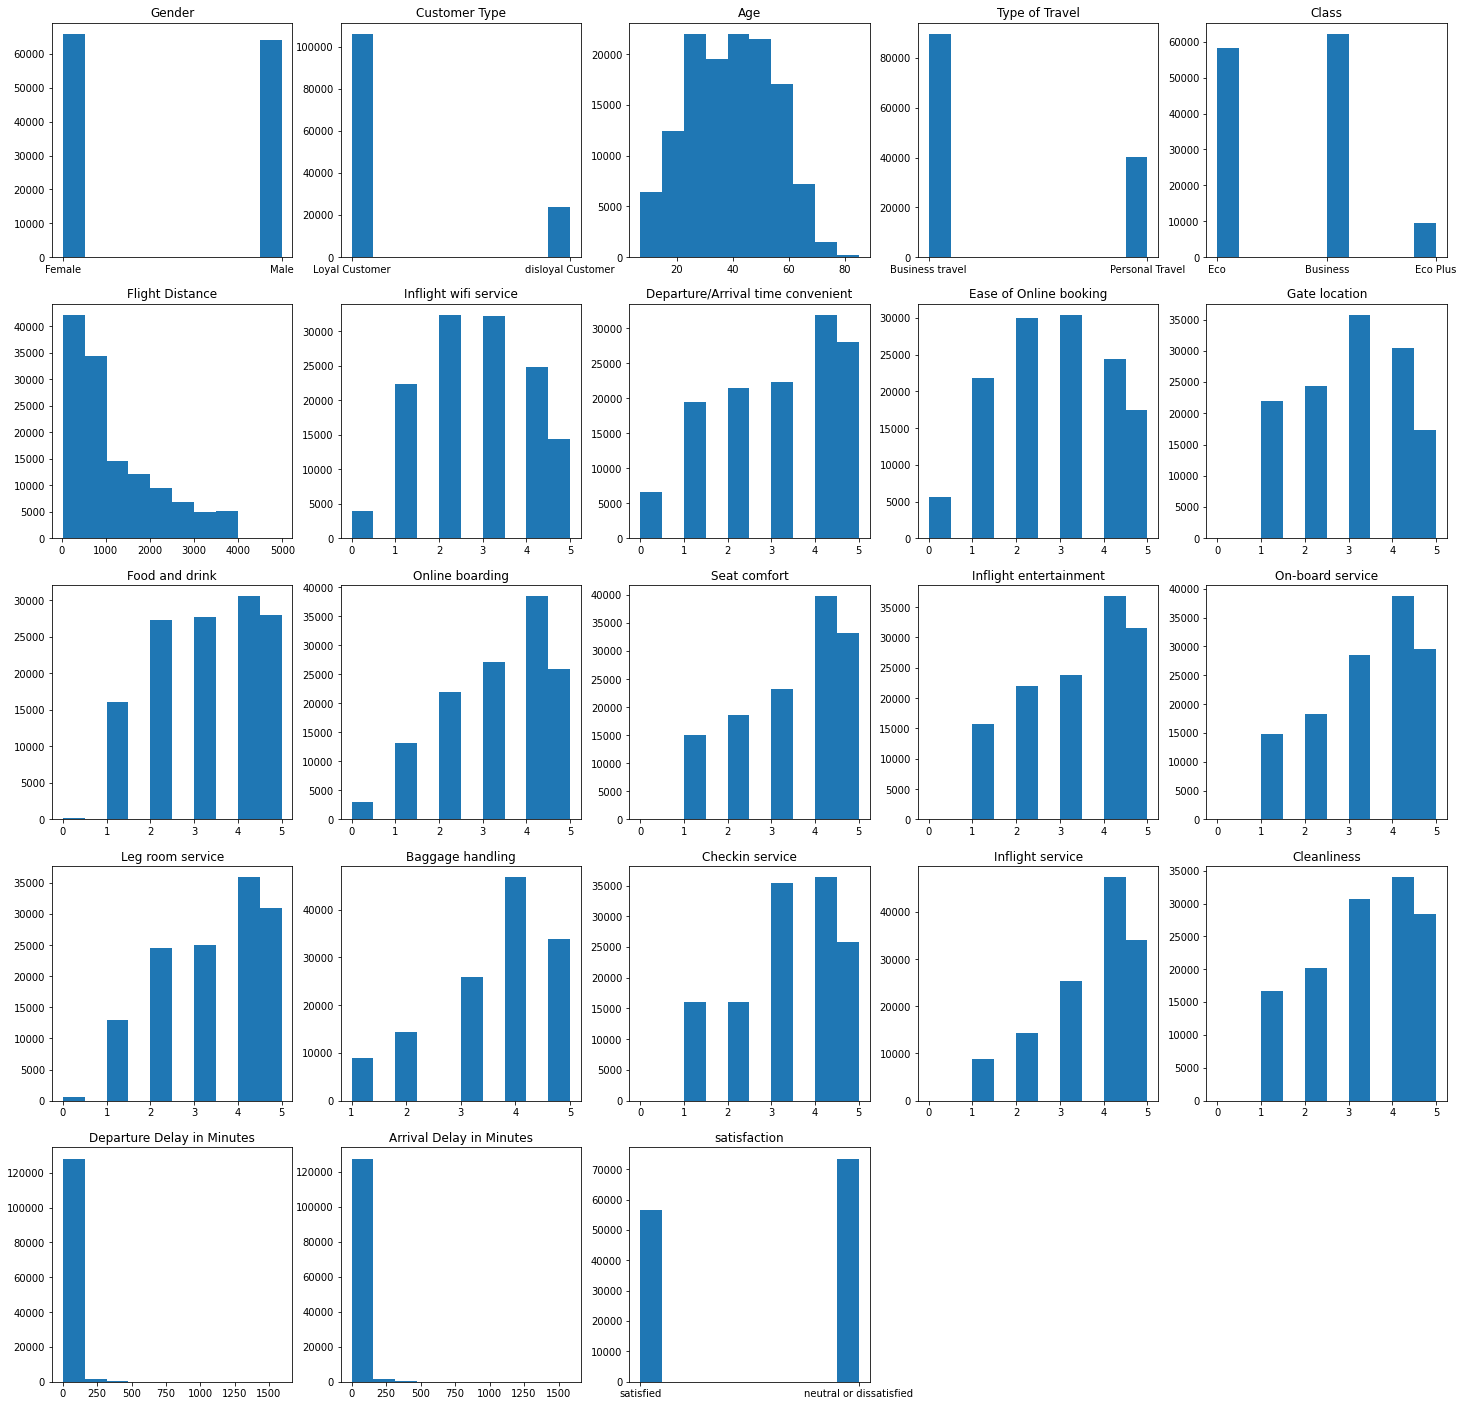

In [ ]:
plt.figure(figsize=(25,25)) 

for index, column in enumerate(df):
  plt.subplot(5,5,index+1)
  plt.hist(df[column])
  plt.title(column)

plt.show()

Now I will look for missing values by checking Null values in all columns.

In [ ]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

These 393 rows are not critical for my dataset size, so I will just Delete all Null values. 

Alternatively, I could have tried to impute the missing value, but I don't see a point of doing it in my situation.

In [ ]:
df.dropna(how='any',axis=0, inplace=True)

Now checking if all Null values were deleted and check the size of the dataframe. 

In [ ]:
display (df.isnull().sum(),df.shape)

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

(129487, 23)

In [ ]:
df["Age"].unique()

array([52, 36, 20, 44, 49, 16, 77, 43, 47, 46, 33, 60, 50, 31, 55, 25, 30,
       62, 24, 22, 51, 56, 41, 53, 12, 39, 32, 40, 42, 28, 59, 58, 27, 67,
       70, 66, 19, 69, 35, 54, 26, 61, 21, 37, 45, 38,  7, 34, 17, 15, 48,
       13, 11, 29,  8, 18, 23, 65, 57, 80, 64,  9, 14, 68, 10, 79, 63, 73,
       74, 71, 72, 76, 78, 75, 85])

lambda in python is an unnamed function.

In [ ]:
df2 = df

In [ ]:

df2['Gender'] = df['Gender'].apply(lambda x: ["Male", "Female"].index(x))


In [ ]:
df2['Class'] = df['Class'].apply(lambda x: ['Eco','Eco Plus','Business'].index(x)+1)

In [ ]:
df2["Class"].unique()

array([1, 3, 2])

In [ ]:
df2["Type of Travel"].unique()

array(['Business travel', 'Personal Travel'], dtype=object)

In [ ]:
df2['Type of Travel'] = df['Type of Travel'].apply(lambda x: ['Personal Travel','Business travel', ].index(x))

In [ ]:
df2["Customer Type"].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [ ]:
df2["Customer Type"] = df["Customer Type"].apply(lambda x: ["disloyal Customer","Loyal Customer"].index(x))

In [ ]:
df2["satisfaction"].unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [ ]:
df2["satisfaction"] = df["satisfaction"].apply(lambda x: ['neutral or dissatisfied','satisfied'].index(x))

In [ ]:
df2

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,52,1,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,1,1,36,1,3,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,0,0,20,1,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,0,1,44,1,3,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,1,1,49,1,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,1,0,23,1,1,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,0
129876,0,1,49,1,3,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,1
129877,0,0,30,1,3,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,0
129878,1,0,22,1,1,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,0


Split dataset into predictor variables and response variables

In [ ]:
X=df2.iloc[:,:-1]
Y=df2.iloc[:,-1:]

Dividing X, Y into train and test

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)

Check if the dataframe was split properly

In [ ]:
display(train_X.shape, train_Y.shape, test_X.shape, test_Y.shape)

(103589, 22)

(103589, 1)

(25898, 22)

(25898, 1)

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(train_X, train_Y)

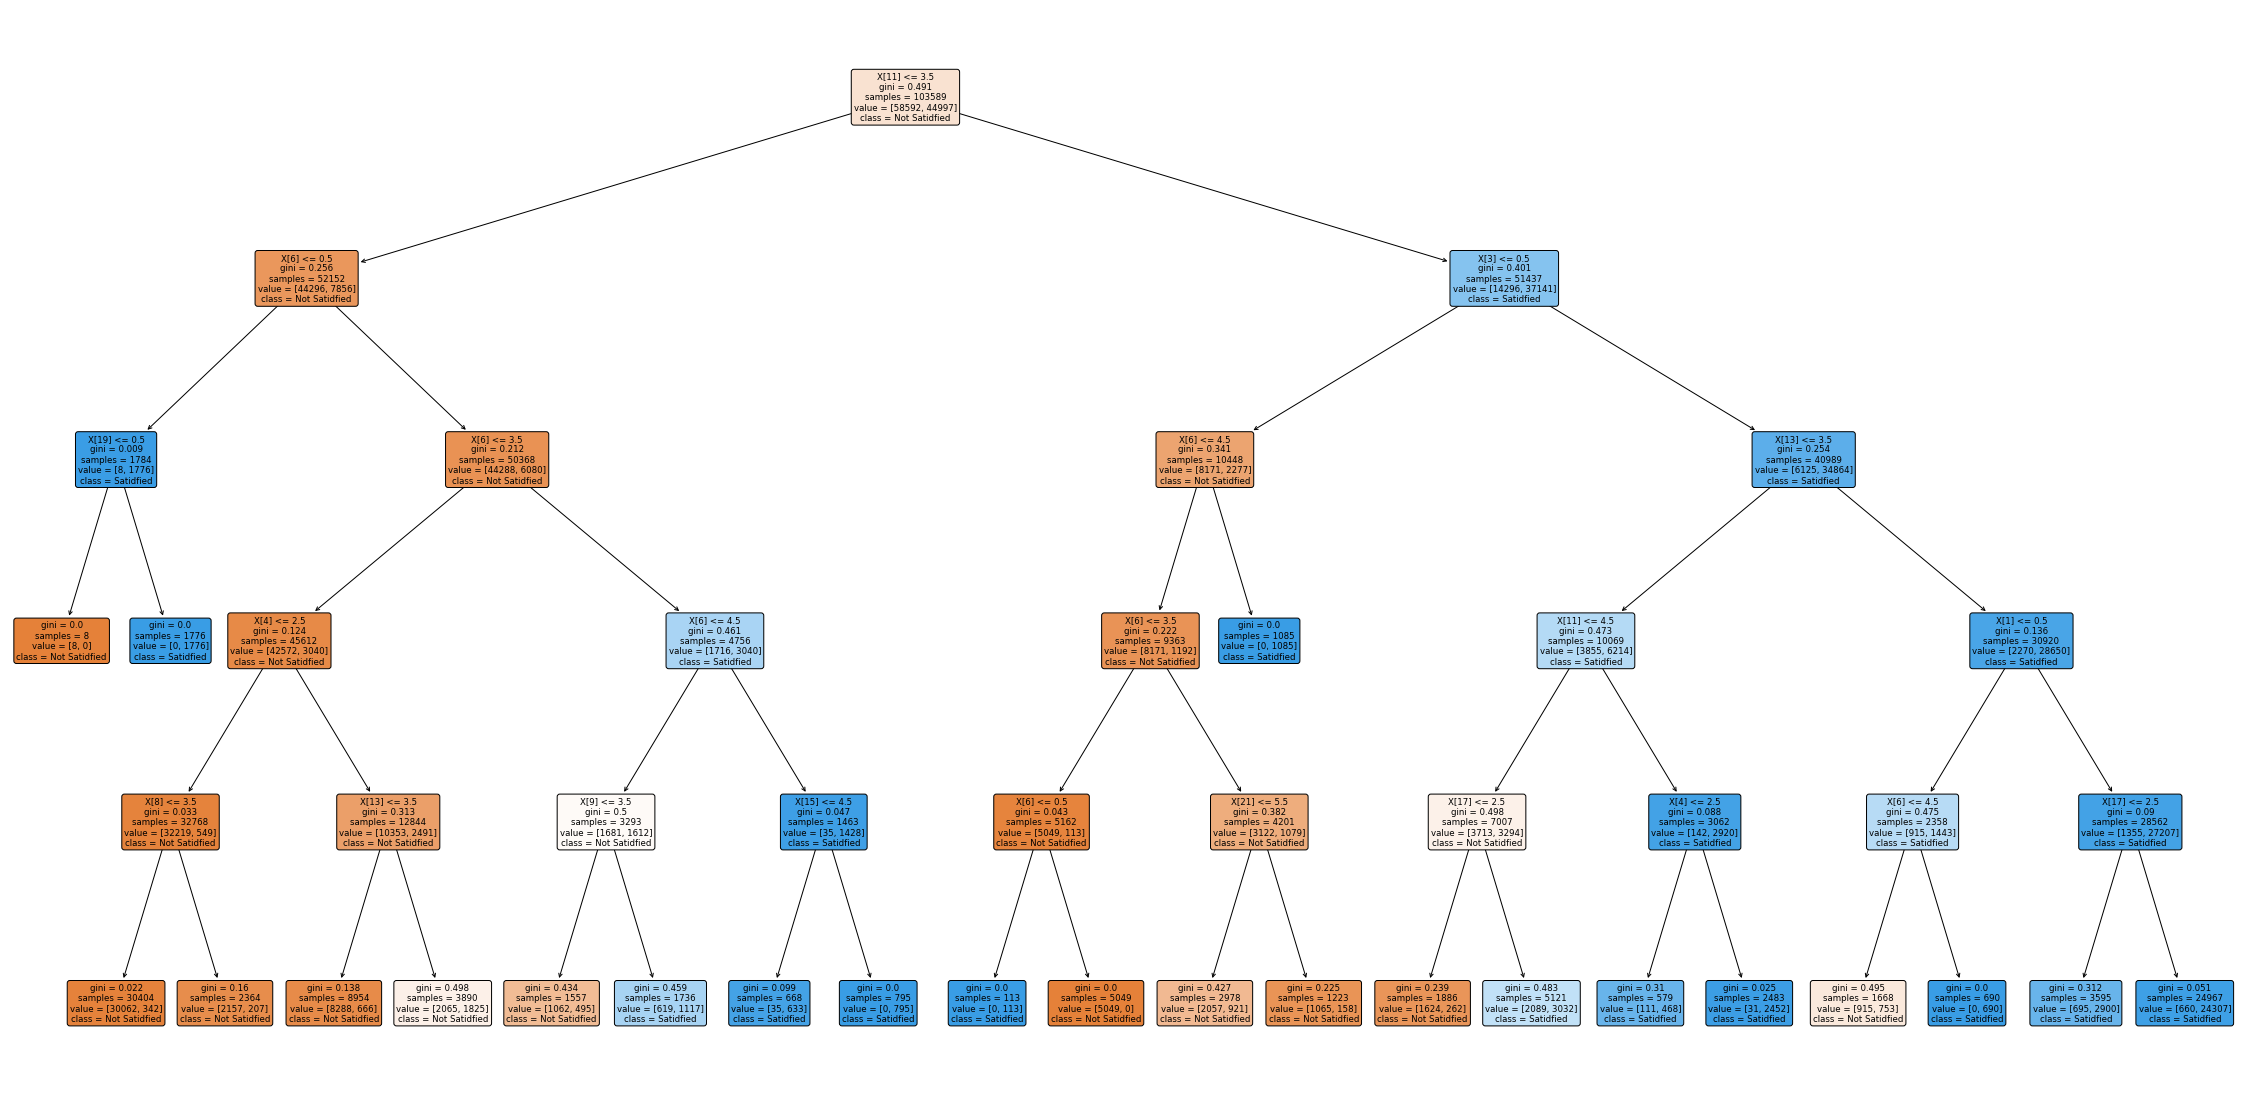

In [ ]:
plt.figure(figsize=(40,20))
tree.plot_tree(clf,
          filled=True,
          rounded=True,
          class_names=["Not Satidfied", "Satidfied"])
plt.show()

In [ ]:
y_pred = clf.predict(test_X)

In [ ]:
metrics.accuracy_score(test_Y, y_pred)

0.9065951038690246

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y, y_pred)

0.9034915699998809

In [ ]:
y_pred2 = clf.predict(train_X)

Accuracy classification score.

In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

In [ ]:
metrics.accuracy_score(train_Y, y_pred2)

0.9047292666209733

Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.

In [ ]:
roc_auc_score(train_Y, y_pred2)

0.9012689716665011

Confusion matrix

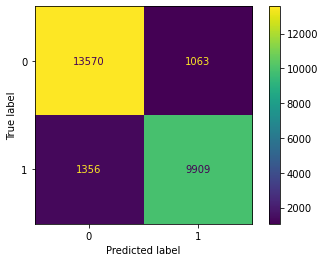

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(test_Y, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                        display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
# Building and validating a model for a given dataset with given max depth
def train_model(max_depth, df):
  X=df.iloc[:,:-1] # extract dataframe to predictor variables
  Y=df.iloc[:,-1:] # extract dataframe to response variables
 
  # split dataset into train and validation subsets
  train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)
  
  #build decision tree classifier and fit it with the given max depth
  clf = tree.DecisionTreeClassifier(max_depth = max_depth) 
  clf = clf.fit(train_X, train_Y) 
 
  # validating the model
  y_pred = clf.predict(test_X) # get predictions for test
  accuracy_test = metrics.accuracy_score(test_Y, y_pred) # accuracy for validation dataset
  roc_auc_test = roc_auc_score(test_Y, y_pred) # ROC AUC for validation dataset

  y_pred2 = clf.predict(train_X) # get predictions for train
  accuracy_train = metrics.accuracy_score(train_Y, y_pred2) # accuracy for train dataset
  roc_auc_train = roc_auc_score(train_Y, y_pred2) # ROC AUC for train dataset

  return ((accuracy_test, roc_auc_test), (accuracy_train, roc_auc_train), clf) # return a tuple with accuracy and ROC AUC for train and test

In [ ]:
from tqdm import tqdm # progress bar

In [ ]:
results = []

for max_depth in tqdm(range(2,50)):
  result = train_model(max_depth, df2)
  results.append((max_depth, result))

100%|██████████| 48/48 [00:49<00:00,  1.03s/it]


In [ ]:
plot_X = [x[0] for x in results] # list comrehension to extract max_depth from values
plot_Y1 = [x[1][0][0] for x in results] # 
plot_Y2 = [x[1][1][0] for x in results] # 
plot_Y3 = [x[1][0][1] for x in results]
plot_Y4 = [x[1][1][1] for x in results]

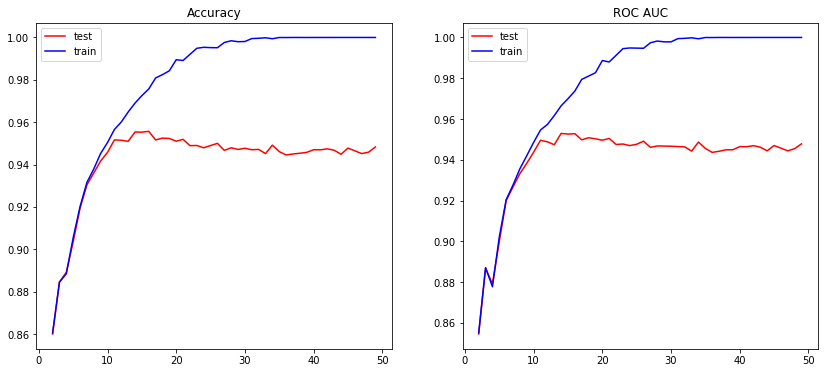

In [ ]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(plot_X, plot_Y1, "r", plot_X, plot_Y2, "b")
plt.title("Accuracy")
plt.legend(['test','train'])


plt.subplot(1,2,2)
plt.plot(plot_X, plot_Y3, "r", plot_X, plot_Y4, "b")
plt.title("ROC AUC")
plt.legend(['test','train'])


plt.show()

In [ ]:
best_result = plot_Y3.index(max(plot_Y3))

In [ ]:
best_model = results[best_result][1][2]

In [ ]:
best_model

DecisionTreeClassifier(max_depth=14)

Validating of the best model on the entire dataset

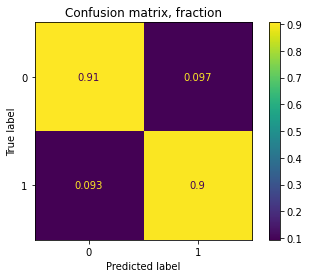

In [ ]:
X=df2.iloc[:,:-1] # extract dataframe to predictor variables
Y=df2.iloc[:,-1:] # extract dataframe to response variables
 
  # split dataset into train and validation subsets
#train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)
   
  # validating the model
y_pred = clf.predict(X)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(Y, y_pred, labels=clf.classes_, normalize='pred')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                        display_labels=clf.classes_)
disp.plot()
plt.title("Confusion matrix, fraction")
plt.show()

Conclusions